# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 46kB/s  eta 0:00:01    91% |█████████████████████████████▍  | 13.4MB 41.0MB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

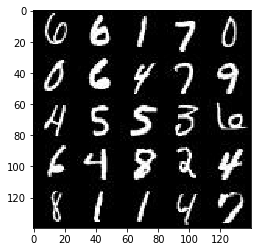

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

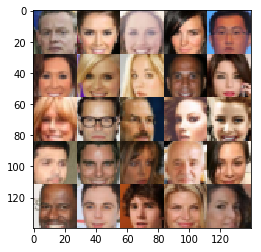

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_images = tf.placeholder(tf.float32,shape=(None,image_height,image_width,image_channels),name='real_images')
    z_input = tf.placeholder(tf.float32,shape=(None,z_dim),name='z_input')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')
    return real_images, z_input, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

### Discriminator Solution ###
For my first pass at implementation, I'm following the  advice in the DCGAN paper:
* No max pooling between convolutions; instead use strided convolutions
* No fully connected layer between final convolution and output
* Batch norm on all except the first convolution layer
* Leaky ReLU on all except output layer
* Sigmoid on output layer

In [7]:
def discriminator(images, reuse=False, alpha=0.1, is_training=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator',reuse=reuse):
#         initializer = tf.contrib.layers.xavier_initializer()
        
        # Input layer is 28x28x3 (celebs) or 28x28x1 (MNIST)
        
        # convolutional layer for input with leaky ReLU (no batch norm)
        x1 = tf.layers.conv2d(images,64,5,strides=(2,2),padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x1 = tf.maximum(x1, x1 * alpha)
        x1 = tf.layers.dropout(x1,0.1,training=is_training)
    
#         x2 = tf.layers.conv2d(x1,64,1,strides=(2,2),padding='same', kernel_initializer=initializer)
#         x2 = tf.layers.batch_normalization(x2,training=is_training)        
#         x2 = tf.maximum(x2, x2 * alpha)
#         x2 = tf.layers.dropout(x2,0.1,training=is_training)
 
        #now 14x14x64
        
        # strided convolutional layer with batch norm and leaky ReLU
        x3 = tf.layers.conv2d(x1,128,5,strides=(2,2),padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3,training=is_training)        
        x3 = tf.maximum(x3, x3 * alpha)
        x3 = tf.layers.dropout(x3,0.1,training=is_training)        
        
#         x4 = tf.layers.conv2d(x3,128,1,strides=(2,2),padding='same', kernel_initializer=initializer)
#         x4 = tf.layers.batch_normalization(x4,training=is_training)        
#         x4 = tf.maximum(x4, x4 * alpha)
#         x4 = tf.layers.dropout(x4,0.1,training=is_training)                        
        
        # now 7 x 7 x 128
        
        # strided convolutional layer with batch norm and leaky ReLU
        x5 = tf.layers.conv2d(x3,256,5,strides=(2,2),padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x5 = tf.layers.batch_normalization(x5,training=is_training)        
        x5 = tf.maximum(x5, x5 * alpha)
#         x5 = tf.layers.dropout(x5,0.1,training=is_training)        

        
#         x6 = tf.layers.conv2d(x5,256,1,strides=(2,2),padding='same', kernel_initializer=initializer)
#         x6 = tf.layers.batch_normalization(x6,training=is_training)        
#         x6 = tf.maximum(x6, x6 * alpha)
#         x6 = tf.layers.dropout(x6,0.1,training=is_training)        


        
        # now 4 x 4 x 256 (since padding='same')
                
        flat = tf.reshape(x5, (-1, 4*4*256))
        logits = tf.layers.dense(flat,1)
        out = tf.sigmoid(logits)
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

### Generator Solution ###
Again, following the DCGAN paper:
* layers of fractionally-strided convolutions
* no fully connected layers


In [8]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse = not(is_train)
    
    with tf.variable_scope('generator', reuse=reuse):
#         initializer = tf.contrib.layers.xavier_initializer()
        
        # Input layer is 28x28x3 (celeba) or 28x28x1 (MNIST)
        
        # convolutional layer for input with leaky ReLU (no batch norm)
        x1 = tf.layers.dense(z,4*4*1024) # fully connected layer to start
        x1 = tf.reshape(x1,(-1,4,4,512)) # reshape to match the size for convolutional net
        x1 = tf.maximum(alpha * x1, x1 ) # leaky ReLU
#         x1 = tf.layers.dropout(x1,0.1,training=is_train)
        
        x2 = tf.layers.conv2d_transpose(x1,1024,1,strides=1,padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2,training=is_train) # batch normalization
        x2 = tf.maximum(alpha * x2, x2 ) # leaky ReLU
        
        # Now 4x4x1024
        
        x3 = tf.layers.conv2d_transpose(x2,512,4,strides=1,padding='valid',kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3,training=is_train) # batch normalization
        x3 = tf.maximum(alpha * x3, x3 ) # leaky ReLU

        # Now 7x7x512

        x4 = tf.layers.conv2d_transpose(x3,512,1,strides=1,padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        x4 = tf.layers.batch_normalization(x4,training=is_train) # batch normalization
        x4 = tf.maximum(alpha * x4, x4 ) # leaky ReLU
        
       
        x5 = tf.layers.conv2d_transpose(x4,256,5,strides=2,padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        x5 = tf.layers.batch_normalization(x5,training=is_train) # batch normalization
        x5 = tf.maximum(alpha * x5, x5 ) # leaky ReLU

        # Now 14x14x256
        
        x6 = tf.layers.conv2d_transpose(x5,256,1,strides=1,padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        x6 = tf.layers.batch_normalization(x6,training=is_train) # batch normalization
        x6 = tf.maximum(alpha * x6, x6 ) # leaky ReLU
        
        
        x7 = tf.layers.conv2d_transpose(x6,128,5,strides=2,padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        x7 = tf.layers.batch_normalization(x7,training=is_train) # batch normalization
        x7 = tf.maximum(alpha * x7, x7 ) # leaky ReLU

        # Now 28x28x128
        
        logits = tf.layers.conv2d_transpose(x7,out_channel_dim,5,strides=1,padding='same')
        # Now 28x28x(out_channel_dim)

        # Squash output to (-1,1) with tanh
        out = tf.tanh(logits)
   
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2, smooth=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z,out_channel_dim,alpha=alpha)
    
    d_model_real, d_logits_real = discriminator(input_real,reuse=False,alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model,reuse=True,alpha=alpha)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_real,
            labels=tf.ones_like(d_model_real)*(1-smooth)
            ))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_fake,
            labels=tf.zeros_like(d_model_fake)*(1-smooth) # note smoothing doesn't do anything here
            ))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_fake,
            labels=tf.ones_like(d_model_fake)
            ))
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get variables
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    
    # Optimization
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        g_train_opt = tf.train.AdamOptimizer(learning_rate,beta1).minimize(g_loss,var_list=g_vars)
        d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1).minimize(d_loss,var_list=d_vars)
    
    
    
    return g_train_opt, d_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.normal(0.0, 1.0, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode,alpha=0.2):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model

    image_height = data_shape[1]
    image_width = data_shape[2]
    image_channels = len(data_image_mode) # RGB = 3; L = 1
    
    real_images, z_input, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_images, z_input, image_channels, alpha=alpha)
    g_train_opt, d_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    
    d_loss_vec = []
    g_loss_vec = []
    
    saver = tf.train.Saver()
    batches_per_epoch = data_shape[0]//batch_size
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for i,batch_images in enumerate(get_batches(batch_size)):
                steps +=1
                batch_images *= 2.
                
                
                batch_z = np.random.normal(0.0,1.0,size=(batch_size,z_dim))
                
                d, _ = sess.run([d_loss, d_train_opt],feed_dict={real_images:batch_images, z_input:batch_z, learn_rate:learning_rate})
                g, _ = sess.run([g_loss, g_train_opt],feed_dict={z_input:batch_z, learn_rate:learning_rate})
                
                d_loss_vec.append(d)
                g_loss_vec.append(g)
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({real_images:batch_images, z_input:batch_z, learn_rate:learning_rate})
                    train_loss_g = g_loss.eval({z_input:batch_z, learn_rate:learning_rate})
                    print("Epoch {}/{}...".format(epoch_i+1,epoch_count),
                          "Step {}/{}...".format(i+1,batches_per_epoch),
                          "Discriminator Loss {:.4f}".format(train_loss_d),
                          "Generator Loss {:.4f}".format(train_loss_g)
                         )
                if steps % show_every == 0:
                    show_generator_output(sess,16,z_input,image_channels,data_image_mode)

        saver.save(sess, './checkpoints/generator.ckpt')
        show_generator_output(sess,8,z_input,image_channels,data_image_mode)                
    Discriminator_loss, = plt.plot(d_loss_vec, color='b', label='Discriminator loss')
    Genereator_loss, = plt.plot(g_loss_vec, color='r', label='Generator loss')
    plt.legend(handles=[ Discriminator_loss, Genereator_loss])

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Step 10/468... Discriminator Loss 1.3060 Generator Loss 1.4221
Epoch 1/2... Step 20/468... Discriminator Loss 0.8468 Generator Loss 1.6169
Epoch 1/2... Step 30/468... Discriminator Loss 1.4632 Generator Loss 2.6322
Epoch 1/2... Step 40/468... Discriminator Loss 1.1909 Generator Loss 0.7561
Epoch 1/2... Step 50/468... Discriminator Loss 0.7690 Generator Loss 1.4339
Epoch 1/2... Step 60/468... Discriminator Loss 1.1496 Generator Loss 0.8644
Epoch 1/2... Step 70/468... Discriminator Loss 1.3030 Generator Loss 0.7926
Epoch 1/2... Step 80/468... Discriminator Loss 1.3821 Generator Loss 0.7684
Epoch 1/2... Step 90/468... Discriminator Loss 1.3451 Generator Loss 0.8053
Epoch 1/2... Step 100/468... Discriminator Loss 1.4021 Generator Loss 0.7874


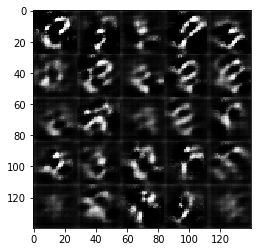

Epoch 1/2... Step 110/468... Discriminator Loss 1.4149 Generator Loss 0.8897
Epoch 1/2... Step 120/468... Discriminator Loss 1.4524 Generator Loss 0.6700
Epoch 1/2... Step 130/468... Discriminator Loss 1.1885 Generator Loss 0.8317
Epoch 1/2... Step 140/468... Discriminator Loss 1.3005 Generator Loss 0.8213
Epoch 1/2... Step 150/468... Discriminator Loss 1.3350 Generator Loss 0.8002
Epoch 1/2... Step 160/468... Discriminator Loss 1.4021 Generator Loss 0.7136
Epoch 1/2... Step 170/468... Discriminator Loss 1.3396 Generator Loss 0.7085
Epoch 1/2... Step 180/468... Discriminator Loss 1.4664 Generator Loss 1.0157
Epoch 1/2... Step 190/468... Discriminator Loss 1.3604 Generator Loss 0.8536
Epoch 1/2... Step 200/468... Discriminator Loss 1.4594 Generator Loss 0.6471


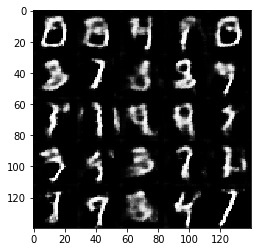

Epoch 1/2... Step 210/468... Discriminator Loss 1.4949 Generator Loss 0.7227
Epoch 1/2... Step 220/468... Discriminator Loss 1.4290 Generator Loss 0.7373
Epoch 1/2... Step 230/468... Discriminator Loss 1.4094 Generator Loss 0.7289
Epoch 1/2... Step 240/468... Discriminator Loss 1.4037 Generator Loss 0.7425
Epoch 1/2... Step 250/468... Discriminator Loss 1.4286 Generator Loss 0.7178
Epoch 1/2... Step 260/468... Discriminator Loss 1.4063 Generator Loss 0.8145
Epoch 1/2... Step 270/468... Discriminator Loss 1.4279 Generator Loss 0.9407
Epoch 1/2... Step 280/468... Discriminator Loss 1.4276 Generator Loss 0.6860
Epoch 1/2... Step 290/468... Discriminator Loss 1.3896 Generator Loss 0.7452
Epoch 1/2... Step 300/468... Discriminator Loss 1.4420 Generator Loss 0.7389


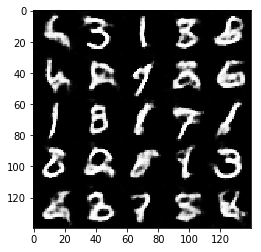

Epoch 1/2... Step 310/468... Discriminator Loss 1.3878 Generator Loss 0.7258
Epoch 1/2... Step 320/468... Discriminator Loss 1.3805 Generator Loss 0.7034
Epoch 1/2... Step 330/468... Discriminator Loss 1.3800 Generator Loss 0.8501
Epoch 1/2... Step 340/468... Discriminator Loss 1.4188 Generator Loss 0.7336
Epoch 1/2... Step 350/468... Discriminator Loss 1.3793 Generator Loss 0.6948
Epoch 1/2... Step 360/468... Discriminator Loss 1.4123 Generator Loss 0.7706
Epoch 1/2... Step 370/468... Discriminator Loss 1.3877 Generator Loss 0.7696
Epoch 1/2... Step 380/468... Discriminator Loss 1.3780 Generator Loss 0.7619
Epoch 1/2... Step 390/468... Discriminator Loss 1.3516 Generator Loss 0.7763
Epoch 1/2... Step 400/468... Discriminator Loss 1.4002 Generator Loss 0.6765


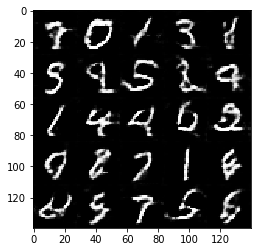

Epoch 1/2... Step 410/468... Discriminator Loss 1.3793 Generator Loss 0.8182
Epoch 1/2... Step 420/468... Discriminator Loss 1.3894 Generator Loss 0.7732
Epoch 1/2... Step 430/468... Discriminator Loss 1.3791 Generator Loss 0.7867
Epoch 1/2... Step 440/468... Discriminator Loss 1.3751 Generator Loss 0.7436
Epoch 1/2... Step 450/468... Discriminator Loss 1.4016 Generator Loss 0.7731
Epoch 1/2... Step 460/468... Discriminator Loss 1.3823 Generator Loss 0.7217
Epoch 2/2... Step 10/468... Discriminator Loss 1.3969 Generator Loss 0.7855
Epoch 2/2... Step 20/468... Discriminator Loss 1.3608 Generator Loss 0.7939
Epoch 2/2... Step 30/468... Discriminator Loss 1.3972 Generator Loss 0.7692
Epoch 2/2... Step 40/468... Discriminator Loss 1.3771 Generator Loss 0.7184
Epoch 2/2... Step 50/468... Discriminator Loss 1.3894 Generator Loss 0.8004
Epoch 2/2... Step 60/468... Discriminator Loss 1.3760 Generator Loss 0.7213
Epoch 2/2... Step 70/468... Discriminator Loss 1.3886 Generator Loss 0.8094
Epoch 

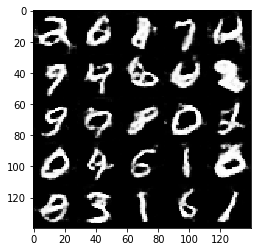

Epoch 2/2... Step 110/468... Discriminator Loss 1.3833 Generator Loss 0.7964
Epoch 2/2... Step 120/468... Discriminator Loss 1.3815 Generator Loss 0.7439
Epoch 2/2... Step 130/468... Discriminator Loss 1.3858 Generator Loss 0.7340
Epoch 2/2... Step 140/468... Discriminator Loss 1.3869 Generator Loss 0.7657
Epoch 2/2... Step 150/468... Discriminator Loss 1.4020 Generator Loss 0.7377
Epoch 2/2... Step 160/468... Discriminator Loss 1.3932 Generator Loss 0.7740
Epoch 2/2... Step 170/468... Discriminator Loss 1.3853 Generator Loss 0.7828
Epoch 2/2... Step 180/468... Discriminator Loss 1.3865 Generator Loss 0.7847
Epoch 2/2... Step 190/468... Discriminator Loss 1.3949 Generator Loss 0.7742
Epoch 2/2... Step 200/468... Discriminator Loss 1.3939 Generator Loss 0.7261


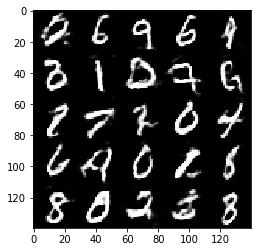

Epoch 2/2... Step 210/468... Discriminator Loss 1.3960 Generator Loss 0.7717
Epoch 2/2... Step 220/468... Discriminator Loss 1.3770 Generator Loss 0.8115
Epoch 2/2... Step 230/468... Discriminator Loss 1.3840 Generator Loss 0.7655
Epoch 2/2... Step 240/468... Discriminator Loss 1.3722 Generator Loss 0.8190
Epoch 2/2... Step 250/468... Discriminator Loss 1.3827 Generator Loss 0.7900
Epoch 2/2... Step 260/468... Discriminator Loss 1.3702 Generator Loss 0.7604
Epoch 2/2... Step 270/468... Discriminator Loss 1.3842 Generator Loss 0.7828
Epoch 2/2... Step 280/468... Discriminator Loss 1.3696 Generator Loss 0.7917
Epoch 2/2... Step 290/468... Discriminator Loss 1.3929 Generator Loss 0.7746
Epoch 2/2... Step 300/468... Discriminator Loss 1.3745 Generator Loss 0.8081


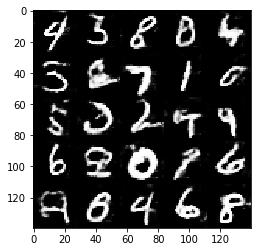

Epoch 2/2... Step 310/468... Discriminator Loss 1.3783 Generator Loss 0.7840
Epoch 2/2... Step 320/468... Discriminator Loss 1.3858 Generator Loss 0.8160
Epoch 2/2... Step 330/468... Discriminator Loss 1.3732 Generator Loss 0.7990
Epoch 2/2... Step 340/468... Discriminator Loss 1.3718 Generator Loss 0.7867
Epoch 2/2... Step 350/468... Discriminator Loss 1.3801 Generator Loss 0.7954
Epoch 2/2... Step 360/468... Discriminator Loss 1.3901 Generator Loss 0.7542
Epoch 2/2... Step 370/468... Discriminator Loss 1.3817 Generator Loss 0.8114
Epoch 2/2... Step 380/468... Discriminator Loss 1.3730 Generator Loss 0.7613
Epoch 2/2... Step 390/468... Discriminator Loss 1.3767 Generator Loss 0.8028
Epoch 2/2... Step 400/468... Discriminator Loss 1.3856 Generator Loss 0.7785


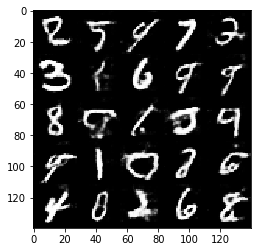

Epoch 2/2... Step 410/468... Discriminator Loss 1.3624 Generator Loss 0.8107
Epoch 2/2... Step 420/468... Discriminator Loss 1.3846 Generator Loss 0.7609
Epoch 2/2... Step 430/468... Discriminator Loss 1.3833 Generator Loss 0.7900
Epoch 2/2... Step 440/468... Discriminator Loss 1.3852 Generator Loss 0.7694
Epoch 2/2... Step 450/468... Discriminator Loss 1.3728 Generator Loss 0.7941
Epoch 2/2... Step 460/468... Discriminator Loss 1.3848 Generator Loss 0.7619


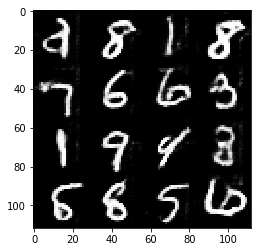

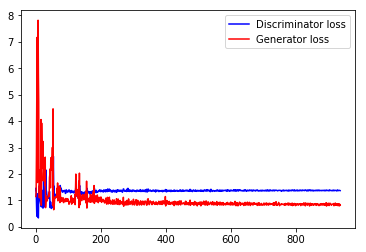

In [13]:
batch_size = 128
z_dim = 200

learning_rate = 0.0008
beta1 = 0.2
alpha = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Step 10/6331... Discriminator Loss 1.0603 Generator Loss 1.0805
Epoch 1/1... Step 20/6331... Discriminator Loss 1.3622 Generator Loss 0.7769
Epoch 1/1... Step 30/6331... Discriminator Loss 1.4442 Generator Loss 0.6690
Epoch 1/1... Step 40/6331... Discriminator Loss 1.4395 Generator Loss 0.8103
Epoch 1/1... Step 50/6331... Discriminator Loss 1.3525 Generator Loss 0.7650
Epoch 1/1... Step 60/6331... Discriminator Loss 1.4338 Generator Loss 0.6593
Epoch 1/1... Step 70/6331... Discriminator Loss 1.4023 Generator Loss 0.7216
Epoch 1/1... Step 80/6331... Discriminator Loss 1.3203 Generator Loss 0.7559
Epoch 1/1... Step 90/6331... Discriminator Loss 1.3516 Generator Loss 0.7554
Epoch 1/1... Step 100/6331... Discriminator Loss 1.4070 Generator Loss 0.8023


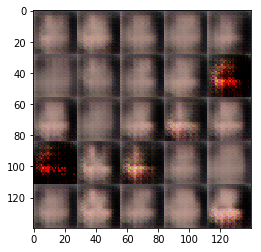

Epoch 1/1... Step 110/6331... Discriminator Loss 1.3660 Generator Loss 0.7013
Epoch 1/1... Step 120/6331... Discriminator Loss 1.4015 Generator Loss 0.7733
Epoch 1/1... Step 130/6331... Discriminator Loss 1.4105 Generator Loss 0.8200
Epoch 1/1... Step 140/6331... Discriminator Loss 1.3481 Generator Loss 0.7928
Epoch 1/1... Step 150/6331... Discriminator Loss 1.3682 Generator Loss 0.8107
Epoch 1/1... Step 160/6331... Discriminator Loss 1.3924 Generator Loss 0.7804
Epoch 1/1... Step 170/6331... Discriminator Loss 1.4071 Generator Loss 0.7569
Epoch 1/1... Step 180/6331... Discriminator Loss 1.3802 Generator Loss 0.8002
Epoch 1/1... Step 190/6331... Discriminator Loss 1.3840 Generator Loss 0.7966
Epoch 1/1... Step 200/6331... Discriminator Loss 1.3350 Generator Loss 0.8155


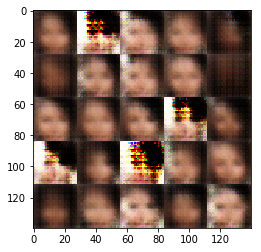

Epoch 1/1... Step 210/6331... Discriminator Loss 1.3731 Generator Loss 0.8000
Epoch 1/1... Step 220/6331... Discriminator Loss 1.3446 Generator Loss 0.8405
Epoch 1/1... Step 230/6331... Discriminator Loss 1.3969 Generator Loss 0.7717
Epoch 1/1... Step 240/6331... Discriminator Loss 1.3240 Generator Loss 0.8115
Epoch 1/1... Step 250/6331... Discriminator Loss 1.3892 Generator Loss 0.7697
Epoch 1/1... Step 260/6331... Discriminator Loss 1.3146 Generator Loss 0.9059
Epoch 1/1... Step 270/6331... Discriminator Loss 1.3976 Generator Loss 0.8590
Epoch 1/1... Step 280/6331... Discriminator Loss 1.3956 Generator Loss 0.7612
Epoch 1/1... Step 290/6331... Discriminator Loss 1.3471 Generator Loss 0.8447
Epoch 1/1... Step 300/6331... Discriminator Loss 1.4295 Generator Loss 0.7344


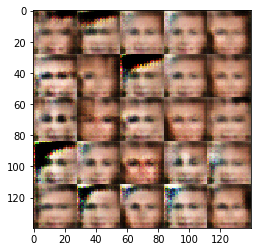

Epoch 1/1... Step 310/6331... Discriminator Loss 1.3542 Generator Loss 0.8055
Epoch 1/1... Step 320/6331... Discriminator Loss 1.4216 Generator Loss 0.7737
Epoch 1/1... Step 330/6331... Discriminator Loss 1.3819 Generator Loss 0.7489
Epoch 1/1... Step 340/6331... Discriminator Loss 1.3936 Generator Loss 0.7603
Epoch 1/1... Step 350/6331... Discriminator Loss 1.2920 Generator Loss 0.8380
Epoch 1/1... Step 360/6331... Discriminator Loss 1.3462 Generator Loss 0.8297
Epoch 1/1... Step 370/6331... Discriminator Loss 1.4014 Generator Loss 0.7375
Epoch 1/1... Step 380/6331... Discriminator Loss 1.4062 Generator Loss 0.7220
Epoch 1/1... Step 390/6331... Discriminator Loss 1.4029 Generator Loss 0.7601
Epoch 1/1... Step 400/6331... Discriminator Loss 1.3789 Generator Loss 0.7731


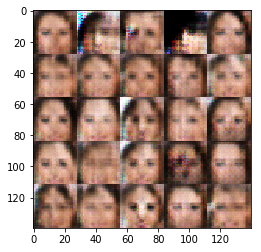

Epoch 1/1... Step 410/6331... Discriminator Loss 1.3897 Generator Loss 0.7465
Epoch 1/1... Step 420/6331... Discriminator Loss 1.3627 Generator Loss 0.8179
Epoch 1/1... Step 430/6331... Discriminator Loss 1.4066 Generator Loss 0.7311
Epoch 1/1... Step 440/6331... Discriminator Loss 1.3757 Generator Loss 0.8298
Epoch 1/1... Step 450/6331... Discriminator Loss 1.3818 Generator Loss 0.7851
Epoch 1/1... Step 460/6331... Discriminator Loss 1.3827 Generator Loss 0.7763
Epoch 1/1... Step 470/6331... Discriminator Loss 1.3887 Generator Loss 0.7888
Epoch 1/1... Step 480/6331... Discriminator Loss 1.3779 Generator Loss 0.7631
Epoch 1/1... Step 490/6331... Discriminator Loss 1.3656 Generator Loss 0.7491
Epoch 1/1... Step 500/6331... Discriminator Loss 1.3910 Generator Loss 0.7595


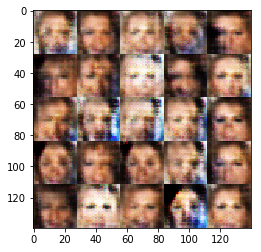

Epoch 1/1... Step 510/6331... Discriminator Loss 1.3710 Generator Loss 0.7863
Epoch 1/1... Step 520/6331... Discriminator Loss 1.3648 Generator Loss 0.7614
Epoch 1/1... Step 530/6331... Discriminator Loss 1.4005 Generator Loss 0.7865
Epoch 1/1... Step 540/6331... Discriminator Loss 1.3735 Generator Loss 0.8015
Epoch 1/1... Step 550/6331... Discriminator Loss 1.3996 Generator Loss 0.7755
Epoch 1/1... Step 560/6331... Discriminator Loss 1.3887 Generator Loss 0.7826
Epoch 1/1... Step 570/6331... Discriminator Loss 1.3851 Generator Loss 0.7622
Epoch 1/1... Step 580/6331... Discriminator Loss 1.4048 Generator Loss 0.7452
Epoch 1/1... Step 590/6331... Discriminator Loss 1.3751 Generator Loss 0.8109
Epoch 1/1... Step 600/6331... Discriminator Loss 1.3626 Generator Loss 0.7750


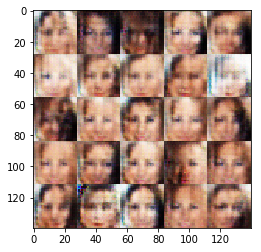

Epoch 1/1... Step 610/6331... Discriminator Loss 1.3564 Generator Loss 0.7932
Epoch 1/1... Step 620/6331... Discriminator Loss 1.3717 Generator Loss 0.8040
Epoch 1/1... Step 630/6331... Discriminator Loss 1.3911 Generator Loss 0.7516
Epoch 1/1... Step 640/6331... Discriminator Loss 1.3944 Generator Loss 0.7619
Epoch 1/1... Step 650/6331... Discriminator Loss 1.3767 Generator Loss 0.8302
Epoch 1/1... Step 660/6331... Discriminator Loss 1.3763 Generator Loss 0.7682
Epoch 1/1... Step 670/6331... Discriminator Loss 1.3530 Generator Loss 0.9310
Epoch 1/1... Step 680/6331... Discriminator Loss 1.3952 Generator Loss 0.8040
Epoch 1/1... Step 690/6331... Discriminator Loss 1.3809 Generator Loss 0.7909
Epoch 1/1... Step 700/6331... Discriminator Loss 1.3827 Generator Loss 0.7952


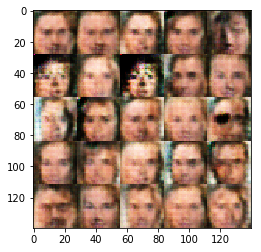

Epoch 1/1... Step 710/6331... Discriminator Loss 1.3698 Generator Loss 0.7913
Epoch 1/1... Step 720/6331... Discriminator Loss 1.3502 Generator Loss 0.8228
Epoch 1/1... Step 730/6331... Discriminator Loss 1.3926 Generator Loss 0.7841
Epoch 1/1... Step 740/6331... Discriminator Loss 1.4036 Generator Loss 0.7525
Epoch 1/1... Step 750/6331... Discriminator Loss 1.3708 Generator Loss 0.8014
Epoch 1/1... Step 760/6331... Discriminator Loss 1.3704 Generator Loss 0.7692
Epoch 1/1... Step 770/6331... Discriminator Loss 1.3620 Generator Loss 0.7915
Epoch 1/1... Step 780/6331... Discriminator Loss 1.4091 Generator Loss 0.7903
Epoch 1/1... Step 790/6331... Discriminator Loss 1.3800 Generator Loss 0.7941
Epoch 1/1... Step 800/6331... Discriminator Loss 1.3845 Generator Loss 0.8044


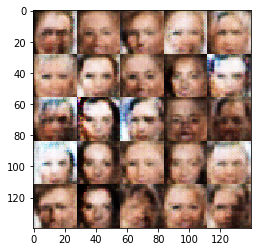

Epoch 1/1... Step 810/6331... Discriminator Loss 1.3573 Generator Loss 0.8028
Epoch 1/1... Step 820/6331... Discriminator Loss 1.3586 Generator Loss 0.7889
Epoch 1/1... Step 830/6331... Discriminator Loss 1.3744 Generator Loss 0.7948
Epoch 1/1... Step 840/6331... Discriminator Loss 1.3765 Generator Loss 0.7756
Epoch 1/1... Step 850/6331... Discriminator Loss 1.3866 Generator Loss 0.8157
Epoch 1/1... Step 860/6331... Discriminator Loss 1.2916 Generator Loss 0.6969
Epoch 1/1... Step 870/6331... Discriminator Loss 0.8151 Generator Loss 1.4773
Epoch 1/1... Step 880/6331... Discriminator Loss 1.3907 Generator Loss 0.8040
Epoch 1/1... Step 890/6331... Discriminator Loss 1.3430 Generator Loss 1.0430
Epoch 1/1... Step 900/6331... Discriminator Loss 1.2851 Generator Loss 0.8136


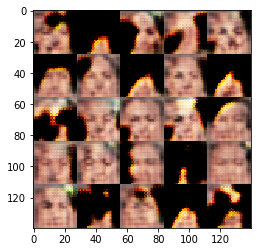

Epoch 1/1... Step 910/6331... Discriminator Loss 1.2226 Generator Loss 0.8231
Epoch 1/1... Step 920/6331... Discriminator Loss 1.2515 Generator Loss 0.8673
Epoch 1/1... Step 930/6331... Discriminator Loss 1.3524 Generator Loss 0.7119
Epoch 1/1... Step 940/6331... Discriminator Loss 1.2467 Generator Loss 0.8973
Epoch 1/1... Step 950/6331... Discriminator Loss 1.3436 Generator Loss 0.7072
Epoch 1/1... Step 960/6331... Discriminator Loss 1.4360 Generator Loss 0.7514
Epoch 1/1... Step 970/6331... Discriminator Loss 1.3101 Generator Loss 0.8677
Epoch 1/1... Step 980/6331... Discriminator Loss 1.3703 Generator Loss 0.7778
Epoch 1/1... Step 990/6331... Discriminator Loss 1.3855 Generator Loss 0.7494
Epoch 1/1... Step 1000/6331... Discriminator Loss 1.3957 Generator Loss 0.8168


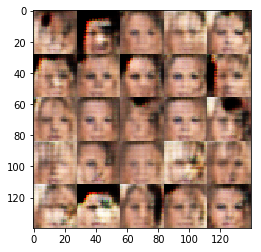

Epoch 1/1... Step 1010/6331... Discriminator Loss 1.3784 Generator Loss 0.7680
Epoch 1/1... Step 1020/6331... Discriminator Loss 1.3225 Generator Loss 0.8230
Epoch 1/1... Step 1030/6331... Discriminator Loss 1.3733 Generator Loss 0.7767
Epoch 1/1... Step 1040/6331... Discriminator Loss 1.3821 Generator Loss 0.7802
Epoch 1/1... Step 1050/6331... Discriminator Loss 1.2431 Generator Loss 0.7720
Epoch 1/1... Step 1060/6331... Discriminator Loss 1.3001 Generator Loss 0.8254
Epoch 1/1... Step 1070/6331... Discriminator Loss 1.4104 Generator Loss 0.7595
Epoch 1/1... Step 1080/6331... Discriminator Loss 1.3667 Generator Loss 0.8414
Epoch 1/1... Step 1090/6331... Discriminator Loss 1.2658 Generator Loss 0.8985
Epoch 1/1... Step 1100/6331... Discriminator Loss 1.3169 Generator Loss 0.7920


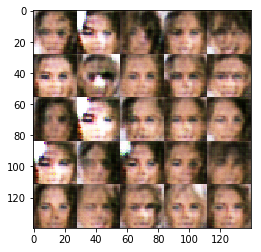

Epoch 1/1... Step 1110/6331... Discriminator Loss 1.3288 Generator Loss 0.7981
Epoch 1/1... Step 1120/6331... Discriminator Loss 1.4303 Generator Loss 0.6546
Epoch 1/1... Step 1130/6331... Discriminator Loss 1.2954 Generator Loss 0.8759
Epoch 1/1... Step 1140/6331... Discriminator Loss 1.3250 Generator Loss 0.8467
Epoch 1/1... Step 1150/6331... Discriminator Loss 1.2904 Generator Loss 0.8311
Epoch 1/1... Step 1160/6331... Discriminator Loss 1.2814 Generator Loss 0.8735
Epoch 1/1... Step 1170/6331... Discriminator Loss 1.3125 Generator Loss 0.9214
Epoch 1/1... Step 1180/6331... Discriminator Loss 1.3483 Generator Loss 0.8832
Epoch 1/1... Step 1190/6331... Discriminator Loss 1.2882 Generator Loss 0.8413
Epoch 1/1... Step 1200/6331... Discriminator Loss 1.3267 Generator Loss 0.8212


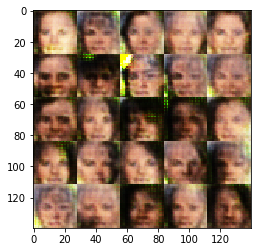

Epoch 1/1... Step 1210/6331... Discriminator Loss 1.3944 Generator Loss 0.8454
Epoch 1/1... Step 1220/6331... Discriminator Loss 1.3409 Generator Loss 0.8421
Epoch 1/1... Step 1230/6331... Discriminator Loss 1.4323 Generator Loss 0.7444
Epoch 1/1... Step 1240/6331... Discriminator Loss 1.4455 Generator Loss 0.6466
Epoch 1/1... Step 1250/6331... Discriminator Loss 1.4431 Generator Loss 0.7353
Epoch 1/1... Step 1260/6331... Discriminator Loss 1.4181 Generator Loss 0.7594
Epoch 1/1... Step 1270/6331... Discriminator Loss 1.3895 Generator Loss 0.7830
Epoch 1/1... Step 1280/6331... Discriminator Loss 1.4181 Generator Loss 0.7614
Epoch 1/1... Step 1290/6331... Discriminator Loss 1.3632 Generator Loss 0.7803
Epoch 1/1... Step 1300/6331... Discriminator Loss 1.4373 Generator Loss 0.7521


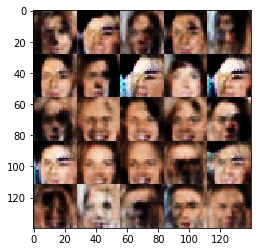

Epoch 1/1... Step 1310/6331... Discriminator Loss 1.2921 Generator Loss 0.7859
Epoch 1/1... Step 1320/6331... Discriminator Loss 1.4212 Generator Loss 0.8389
Epoch 1/1... Step 1330/6331... Discriminator Loss 1.4365 Generator Loss 0.7574
Epoch 1/1... Step 1340/6331... Discriminator Loss 1.3854 Generator Loss 0.8982
Epoch 1/1... Step 1350/6331... Discriminator Loss 1.3170 Generator Loss 0.8112
Epoch 1/1... Step 1360/6331... Discriminator Loss 1.4013 Generator Loss 0.7959
Epoch 1/1... Step 1370/6331... Discriminator Loss 1.3897 Generator Loss 0.7632
Epoch 1/1... Step 1380/6331... Discriminator Loss 1.3814 Generator Loss 0.8221
Epoch 1/1... Step 1390/6331... Discriminator Loss 1.3958 Generator Loss 0.7254
Epoch 1/1... Step 1400/6331... Discriminator Loss 1.3771 Generator Loss 0.8322


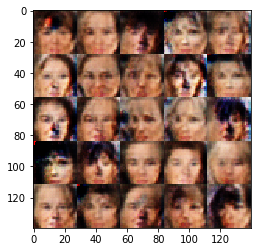

Epoch 1/1... Step 1410/6331... Discriminator Loss 1.4541 Generator Loss 0.7326
Epoch 1/1... Step 1420/6331... Discriminator Loss 1.3723 Generator Loss 0.7526
Epoch 1/1... Step 1430/6331... Discriminator Loss 1.3321 Generator Loss 0.8023
Epoch 1/1... Step 1440/6331... Discriminator Loss 1.3742 Generator Loss 0.7804
Epoch 1/1... Step 1450/6331... Discriminator Loss 1.3832 Generator Loss 0.7068
Epoch 1/1... Step 1460/6331... Discriminator Loss 1.3238 Generator Loss 0.7913
Epoch 1/1... Step 1470/6331... Discriminator Loss 1.3576 Generator Loss 0.7479
Epoch 1/1... Step 1480/6331... Discriminator Loss 1.3375 Generator Loss 0.7499
Epoch 1/1... Step 1490/6331... Discriminator Loss 1.3519 Generator Loss 0.7756
Epoch 1/1... Step 1500/6331... Discriminator Loss 1.3077 Generator Loss 0.8047


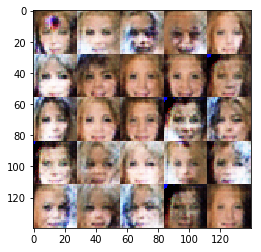

Epoch 1/1... Step 1510/6331... Discriminator Loss 1.3490 Generator Loss 0.8124
Epoch 1/1... Step 1520/6331... Discriminator Loss 1.3962 Generator Loss 0.7447
Epoch 1/1... Step 1530/6331... Discriminator Loss 1.3688 Generator Loss 0.8199
Epoch 1/1... Step 1540/6331... Discriminator Loss 1.3355 Generator Loss 0.7762
Epoch 1/1... Step 1550/6331... Discriminator Loss 1.4923 Generator Loss 0.7875
Epoch 1/1... Step 1560/6331... Discriminator Loss 1.4402 Generator Loss 0.7231
Epoch 1/1... Step 1570/6331... Discriminator Loss 1.3087 Generator Loss 0.7856
Epoch 1/1... Step 1580/6331... Discriminator Loss 1.3791 Generator Loss 0.7316
Epoch 1/1... Step 1590/6331... Discriminator Loss 1.4068 Generator Loss 0.7490
Epoch 1/1... Step 1600/6331... Discriminator Loss 1.3506 Generator Loss 0.8382


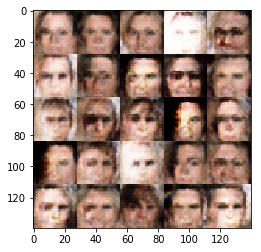

Epoch 1/1... Step 1610/6331... Discriminator Loss 1.3903 Generator Loss 0.7002
Epoch 1/1... Step 1620/6331... Discriminator Loss 1.4004 Generator Loss 0.7753
Epoch 1/1... Step 1630/6331... Discriminator Loss 1.3085 Generator Loss 0.9344
Epoch 1/1... Step 1640/6331... Discriminator Loss 1.3748 Generator Loss 0.7332
Epoch 1/1... Step 1650/6331... Discriminator Loss 1.3328 Generator Loss 0.8070
Epoch 1/1... Step 1660/6331... Discriminator Loss 1.3874 Generator Loss 0.7534
Epoch 1/1... Step 1670/6331... Discriminator Loss 1.3753 Generator Loss 0.8055
Epoch 1/1... Step 1680/6331... Discriminator Loss 1.3237 Generator Loss 0.7888
Epoch 1/1... Step 1690/6331... Discriminator Loss 1.4159 Generator Loss 0.7981
Epoch 1/1... Step 1700/6331... Discriminator Loss 1.3501 Generator Loss 0.7949


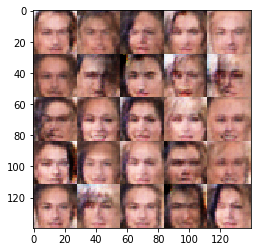

Epoch 1/1... Step 1710/6331... Discriminator Loss 1.3620 Generator Loss 0.7827
Epoch 1/1... Step 1720/6331... Discriminator Loss 1.3986 Generator Loss 0.7492
Epoch 1/1... Step 1730/6331... Discriminator Loss 1.4029 Generator Loss 0.7410
Epoch 1/1... Step 1740/6331... Discriminator Loss 1.4018 Generator Loss 0.8145
Epoch 1/1... Step 1750/6331... Discriminator Loss 1.3508 Generator Loss 0.7923
Epoch 1/1... Step 1760/6331... Discriminator Loss 1.3220 Generator Loss 0.7775
Epoch 1/1... Step 1770/6331... Discriminator Loss 1.4322 Generator Loss 0.6996
Epoch 1/1... Step 1780/6331... Discriminator Loss 1.3366 Generator Loss 0.8498
Epoch 1/1... Step 1790/6331... Discriminator Loss 1.3834 Generator Loss 0.7623
Epoch 1/1... Step 1800/6331... Discriminator Loss 1.3939 Generator Loss 0.7202


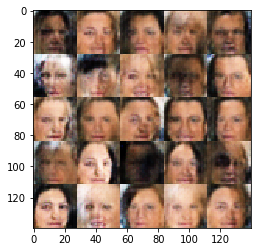

Epoch 1/1... Step 1810/6331... Discriminator Loss 1.3943 Generator Loss 0.8265
Epoch 1/1... Step 1820/6331... Discriminator Loss 1.3718 Generator Loss 0.7728
Epoch 1/1... Step 1830/6331... Discriminator Loss 1.4269 Generator Loss 0.7358
Epoch 1/1... Step 1840/6331... Discriminator Loss 1.3823 Generator Loss 0.8049
Epoch 1/1... Step 1850/6331... Discriminator Loss 1.3448 Generator Loss 0.8187
Epoch 1/1... Step 1860/6331... Discriminator Loss 1.3420 Generator Loss 0.7378
Epoch 1/1... Step 1870/6331... Discriminator Loss 1.3500 Generator Loss 0.8325
Epoch 1/1... Step 1880/6331... Discriminator Loss 1.3716 Generator Loss 0.7264
Epoch 1/1... Step 1890/6331... Discriminator Loss 1.3211 Generator Loss 0.7684
Epoch 1/1... Step 1900/6331... Discriminator Loss 1.4006 Generator Loss 0.7972


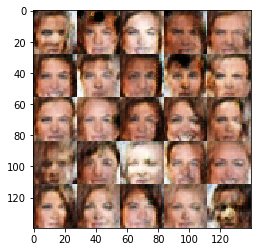

Epoch 1/1... Step 1910/6331... Discriminator Loss 1.3217 Generator Loss 0.7512
Epoch 1/1... Step 1920/6331... Discriminator Loss 1.3903 Generator Loss 0.7650
Epoch 1/1... Step 1930/6331... Discriminator Loss 1.3827 Generator Loss 0.6808
Epoch 1/1... Step 1940/6331... Discriminator Loss 1.4287 Generator Loss 0.6942
Epoch 1/1... Step 1950/6331... Discriminator Loss 1.3835 Generator Loss 0.7967
Epoch 1/1... Step 1960/6331... Discriminator Loss 1.3952 Generator Loss 0.7629
Epoch 1/1... Step 1970/6331... Discriminator Loss 1.4814 Generator Loss 0.7495
Epoch 1/1... Step 1980/6331... Discriminator Loss 1.3847 Generator Loss 0.7726
Epoch 1/1... Step 1990/6331... Discriminator Loss 1.3615 Generator Loss 0.7886
Epoch 1/1... Step 2000/6331... Discriminator Loss 1.3847 Generator Loss 0.8210


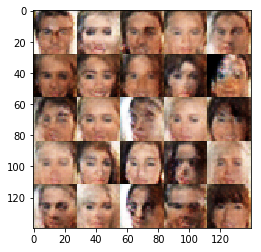

Epoch 1/1... Step 2010/6331... Discriminator Loss 1.3420 Generator Loss 0.7892
Epoch 1/1... Step 2020/6331... Discriminator Loss 1.4155 Generator Loss 0.7950
Epoch 1/1... Step 2030/6331... Discriminator Loss 1.4194 Generator Loss 0.7214
Epoch 1/1... Step 2040/6331... Discriminator Loss 1.3825 Generator Loss 0.7962
Epoch 1/1... Step 2050/6331... Discriminator Loss 1.3778 Generator Loss 0.8427
Epoch 1/1... Step 2060/6331... Discriminator Loss 1.3457 Generator Loss 0.7633
Epoch 1/1... Step 2070/6331... Discriminator Loss 1.4143 Generator Loss 0.7963
Epoch 1/1... Step 2080/6331... Discriminator Loss 1.3575 Generator Loss 0.7573
Epoch 1/1... Step 2090/6331... Discriminator Loss 1.4345 Generator Loss 0.7600
Epoch 1/1... Step 2100/6331... Discriminator Loss 1.3627 Generator Loss 0.8173


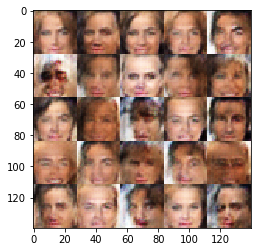

Epoch 1/1... Step 2110/6331... Discriminator Loss 1.3496 Generator Loss 0.7253
Epoch 1/1... Step 2120/6331... Discriminator Loss 1.3924 Generator Loss 0.7227
Epoch 1/1... Step 2130/6331... Discriminator Loss 1.3298 Generator Loss 0.7859
Epoch 1/1... Step 2140/6331... Discriminator Loss 1.3780 Generator Loss 0.7765
Epoch 1/1... Step 2150/6331... Discriminator Loss 1.4255 Generator Loss 0.7411
Epoch 1/1... Step 2160/6331... Discriminator Loss 1.3601 Generator Loss 0.7787
Epoch 1/1... Step 2170/6331... Discriminator Loss 1.3436 Generator Loss 0.7976
Epoch 1/1... Step 2180/6331... Discriminator Loss 1.3580 Generator Loss 0.7512
Epoch 1/1... Step 2190/6331... Discriminator Loss 1.3610 Generator Loss 0.7926
Epoch 1/1... Step 2200/6331... Discriminator Loss 1.3688 Generator Loss 0.7811


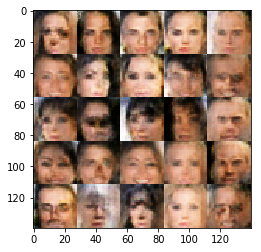

Epoch 1/1... Step 2210/6331... Discriminator Loss 1.3650 Generator Loss 0.8158
Epoch 1/1... Step 2220/6331... Discriminator Loss 1.3842 Generator Loss 0.7732
Epoch 1/1... Step 2230/6331... Discriminator Loss 1.3730 Generator Loss 0.8432
Epoch 1/1... Step 2240/6331... Discriminator Loss 1.3580 Generator Loss 0.7533
Epoch 1/1... Step 2250/6331... Discriminator Loss 1.3967 Generator Loss 0.7753
Epoch 1/1... Step 2260/6331... Discriminator Loss 1.3612 Generator Loss 0.7772
Epoch 1/1... Step 2270/6331... Discriminator Loss 1.3708 Generator Loss 0.7917
Epoch 1/1... Step 2280/6331... Discriminator Loss 1.3596 Generator Loss 0.7609
Epoch 1/1... Step 2290/6331... Discriminator Loss 1.3556 Generator Loss 0.7777
Epoch 1/1... Step 2300/6331... Discriminator Loss 1.3661 Generator Loss 0.7312


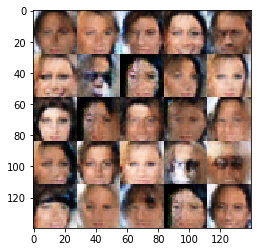

Epoch 1/1... Step 2310/6331... Discriminator Loss 1.3944 Generator Loss 0.7823
Epoch 1/1... Step 2320/6331... Discriminator Loss 1.2982 Generator Loss 0.8146
Epoch 1/1... Step 2330/6331... Discriminator Loss 1.3908 Generator Loss 0.7668
Epoch 1/1... Step 2340/6331... Discriminator Loss 1.4238 Generator Loss 0.7050
Epoch 1/1... Step 2350/6331... Discriminator Loss 1.3731 Generator Loss 0.7751
Epoch 1/1... Step 2360/6331... Discriminator Loss 1.3912 Generator Loss 0.7108
Epoch 1/1... Step 2370/6331... Discriminator Loss 1.3672 Generator Loss 0.7700
Epoch 1/1... Step 2380/6331... Discriminator Loss 1.3327 Generator Loss 0.8086
Epoch 1/1... Step 2390/6331... Discriminator Loss 1.3640 Generator Loss 0.8500
Epoch 1/1... Step 2400/6331... Discriminator Loss 1.3517 Generator Loss 0.7732


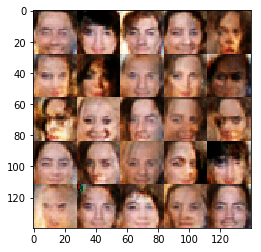

Epoch 1/1... Step 2410/6331... Discriminator Loss 1.4157 Generator Loss 0.7040
Epoch 1/1... Step 2420/6331... Discriminator Loss 1.3553 Generator Loss 0.7963
Epoch 1/1... Step 2430/6331... Discriminator Loss 1.3636 Generator Loss 0.8118
Epoch 1/1... Step 2440/6331... Discriminator Loss 1.3858 Generator Loss 0.7388
Epoch 1/1... Step 2450/6331... Discriminator Loss 1.3627 Generator Loss 0.8116
Epoch 1/1... Step 2460/6331... Discriminator Loss 1.3965 Generator Loss 0.7811
Epoch 1/1... Step 2470/6331... Discriminator Loss 1.3565 Generator Loss 0.7962
Epoch 1/1... Step 2480/6331... Discriminator Loss 1.3748 Generator Loss 0.7851
Epoch 1/1... Step 2490/6331... Discriminator Loss 1.4134 Generator Loss 0.7193
Epoch 1/1... Step 2500/6331... Discriminator Loss 1.3833 Generator Loss 0.7301


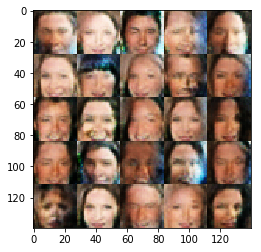

Epoch 1/1... Step 2510/6331... Discriminator Loss 1.4103 Generator Loss 0.7613
Epoch 1/1... Step 2520/6331... Discriminator Loss 1.3743 Generator Loss 0.7785
Epoch 1/1... Step 2530/6331... Discriminator Loss 1.3756 Generator Loss 0.7661
Epoch 1/1... Step 2540/6331... Discriminator Loss 1.3710 Generator Loss 0.7854
Epoch 1/1... Step 2550/6331... Discriminator Loss 1.3637 Generator Loss 0.7847
Epoch 1/1... Step 2560/6331... Discriminator Loss 1.3996 Generator Loss 0.7372
Epoch 1/1... Step 2570/6331... Discriminator Loss 1.3906 Generator Loss 0.8378
Epoch 1/1... Step 2580/6331... Discriminator Loss 1.3528 Generator Loss 0.9542
Epoch 1/1... Step 2590/6331... Discriminator Loss 1.3665 Generator Loss 0.8258
Epoch 1/1... Step 2600/6331... Discriminator Loss 1.3532 Generator Loss 0.8164


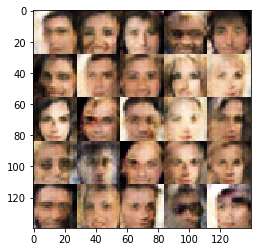

Epoch 1/1... Step 2610/6331... Discriminator Loss 1.3554 Generator Loss 0.7804
Epoch 1/1... Step 2620/6331... Discriminator Loss 1.3803 Generator Loss 0.7855
Epoch 1/1... Step 2630/6331... Discriminator Loss 1.3304 Generator Loss 0.7714
Epoch 1/1... Step 2640/6331... Discriminator Loss 1.3743 Generator Loss 0.7645
Epoch 1/1... Step 2650/6331... Discriminator Loss 1.4363 Generator Loss 0.7323
Epoch 1/1... Step 2660/6331... Discriminator Loss 1.4183 Generator Loss 0.7715
Epoch 1/1... Step 2670/6331... Discriminator Loss 1.3769 Generator Loss 0.8234
Epoch 1/1... Step 2680/6331... Discriminator Loss 1.3639 Generator Loss 0.7513
Epoch 1/1... Step 2690/6331... Discriminator Loss 1.3876 Generator Loss 0.7801
Epoch 1/1... Step 2700/6331... Discriminator Loss 1.3650 Generator Loss 0.7885


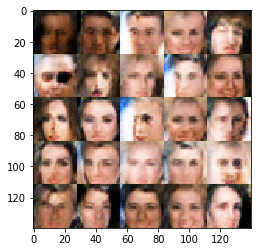

Epoch 1/1... Step 2710/6331... Discriminator Loss 1.3963 Generator Loss 0.7617
Epoch 1/1... Step 2720/6331... Discriminator Loss 1.3624 Generator Loss 0.7415
Epoch 1/1... Step 2730/6331... Discriminator Loss 1.4045 Generator Loss 0.7958
Epoch 1/1... Step 2740/6331... Discriminator Loss 1.3624 Generator Loss 0.7624
Epoch 1/1... Step 2750/6331... Discriminator Loss 1.3725 Generator Loss 0.8048
Epoch 1/1... Step 2760/6331... Discriminator Loss 1.3997 Generator Loss 0.7280
Epoch 1/1... Step 2770/6331... Discriminator Loss 1.3814 Generator Loss 0.7693
Epoch 1/1... Step 2780/6331... Discriminator Loss 1.3669 Generator Loss 0.7729
Epoch 1/1... Step 2790/6331... Discriminator Loss 1.3728 Generator Loss 0.7851
Epoch 1/1... Step 2800/6331... Discriminator Loss 1.3648 Generator Loss 0.7621


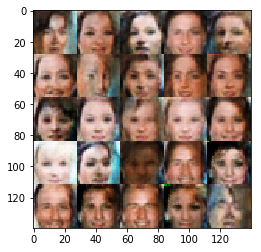

Epoch 1/1... Step 2810/6331... Discriminator Loss 1.3862 Generator Loss 0.7420
Epoch 1/1... Step 2820/6331... Discriminator Loss 1.3751 Generator Loss 0.8182
Epoch 1/1... Step 2830/6331... Discriminator Loss 1.3539 Generator Loss 0.7880
Epoch 1/1... Step 2840/6331... Discriminator Loss 1.3777 Generator Loss 0.7358
Epoch 1/1... Step 2850/6331... Discriminator Loss 1.3758 Generator Loss 0.8193
Epoch 1/1... Step 2860/6331... Discriminator Loss 1.3560 Generator Loss 0.7666
Epoch 1/1... Step 2870/6331... Discriminator Loss 1.3655 Generator Loss 0.7982
Epoch 1/1... Step 2880/6331... Discriminator Loss 1.3684 Generator Loss 0.8440
Epoch 1/1... Step 2890/6331... Discriminator Loss 1.4264 Generator Loss 0.8030
Epoch 1/1... Step 2900/6331... Discriminator Loss 1.3608 Generator Loss 0.7345


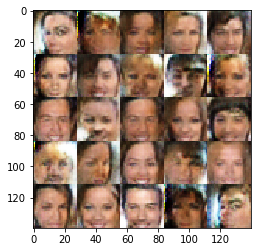

Epoch 1/1... Step 2910/6331... Discriminator Loss 1.3690 Generator Loss 0.8108
Epoch 1/1... Step 2920/6331... Discriminator Loss 1.3813 Generator Loss 0.8374
Epoch 1/1... Step 2930/6331... Discriminator Loss 1.3515 Generator Loss 0.7776
Epoch 1/1... Step 2940/6331... Discriminator Loss 1.3861 Generator Loss 0.7696
Epoch 1/1... Step 2950/6331... Discriminator Loss 1.3660 Generator Loss 0.7810
Epoch 1/1... Step 2960/6331... Discriminator Loss 1.3634 Generator Loss 0.7433
Epoch 1/1... Step 2970/6331... Discriminator Loss 1.3808 Generator Loss 0.7731
Epoch 1/1... Step 2980/6331... Discriminator Loss 1.3674 Generator Loss 0.7733
Epoch 1/1... Step 2990/6331... Discriminator Loss 1.3784 Generator Loss 0.7862
Epoch 1/1... Step 3000/6331... Discriminator Loss 1.3537 Generator Loss 0.7776


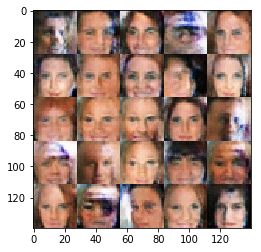

Epoch 1/1... Step 3010/6331... Discriminator Loss 1.3662 Generator Loss 0.7840
Epoch 1/1... Step 3020/6331... Discriminator Loss 1.3677 Generator Loss 0.7695
Epoch 1/1... Step 3030/6331... Discriminator Loss 1.3720 Generator Loss 0.7924
Epoch 1/1... Step 3040/6331... Discriminator Loss 1.3335 Generator Loss 0.7930
Epoch 1/1... Step 3050/6331... Discriminator Loss 1.3708 Generator Loss 0.7746
Epoch 1/1... Step 3060/6331... Discriminator Loss 1.3457 Generator Loss 0.7890
Epoch 1/1... Step 3070/6331... Discriminator Loss 1.4071 Generator Loss 0.7509
Epoch 1/1... Step 3080/6331... Discriminator Loss 1.3734 Generator Loss 0.7495
Epoch 1/1... Step 3090/6331... Discriminator Loss 1.3482 Generator Loss 0.8357
Epoch 1/1... Step 3100/6331... Discriminator Loss 1.3559 Generator Loss 0.7727


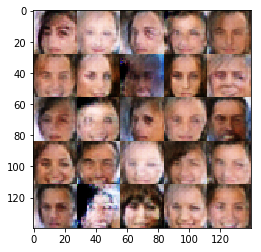

Epoch 1/1... Step 3110/6331... Discriminator Loss 1.3525 Generator Loss 0.8184
Epoch 1/1... Step 3120/6331... Discriminator Loss 1.3859 Generator Loss 0.7511
Epoch 1/1... Step 3130/6331... Discriminator Loss 1.3442 Generator Loss 0.8453
Epoch 1/1... Step 3140/6331... Discriminator Loss 1.4020 Generator Loss 0.8116
Epoch 1/1... Step 3150/6331... Discriminator Loss 1.3727 Generator Loss 0.7027
Epoch 1/1... Step 3160/6331... Discriminator Loss 1.3858 Generator Loss 0.7640
Epoch 1/1... Step 3170/6331... Discriminator Loss 1.3677 Generator Loss 0.7840
Epoch 1/1... Step 3180/6331... Discriminator Loss 1.3653 Generator Loss 0.7541
Epoch 1/1... Step 3190/6331... Discriminator Loss 1.3918 Generator Loss 0.7956
Epoch 1/1... Step 3200/6331... Discriminator Loss 1.3550 Generator Loss 0.8206


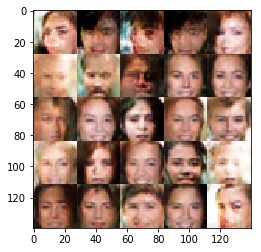

Epoch 1/1... Step 3210/6331... Discriminator Loss 1.3986 Generator Loss 0.7472
Epoch 1/1... Step 3220/6331... Discriminator Loss 1.3915 Generator Loss 0.8066
Epoch 1/1... Step 3230/6331... Discriminator Loss 1.3980 Generator Loss 0.7721
Epoch 1/1... Step 3240/6331... Discriminator Loss 1.3881 Generator Loss 0.7388
Epoch 1/1... Step 3250/6331... Discriminator Loss 1.3627 Generator Loss 0.7926
Epoch 1/1... Step 3260/6331... Discriminator Loss 1.3867 Generator Loss 0.7266
Epoch 1/1... Step 3270/6331... Discriminator Loss 1.3639 Generator Loss 0.7993
Epoch 1/1... Step 3280/6331... Discriminator Loss 1.3371 Generator Loss 0.7629
Epoch 1/1... Step 3290/6331... Discriminator Loss 1.4137 Generator Loss 0.7418
Epoch 1/1... Step 3300/6331... Discriminator Loss 1.3759 Generator Loss 0.7834


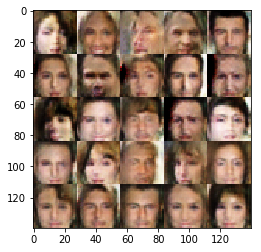

Epoch 1/1... Step 3310/6331... Discriminator Loss 1.4110 Generator Loss 0.7873
Epoch 1/1... Step 3320/6331... Discriminator Loss 1.3927 Generator Loss 0.7458
Epoch 1/1... Step 3330/6331... Discriminator Loss 1.3738 Generator Loss 0.8025
Epoch 1/1... Step 3340/6331... Discriminator Loss 1.3837 Generator Loss 0.7963
Epoch 1/1... Step 3350/6331... Discriminator Loss 1.3583 Generator Loss 0.7642
Epoch 1/1... Step 3360/6331... Discriminator Loss 1.3487 Generator Loss 0.7966
Epoch 1/1... Step 3370/6331... Discriminator Loss 1.3832 Generator Loss 0.7777
Epoch 1/1... Step 3380/6331... Discriminator Loss 1.4012 Generator Loss 0.8009
Epoch 1/1... Step 3390/6331... Discriminator Loss 1.3710 Generator Loss 0.7359
Epoch 1/1... Step 3400/6331... Discriminator Loss 1.3898 Generator Loss 0.7609


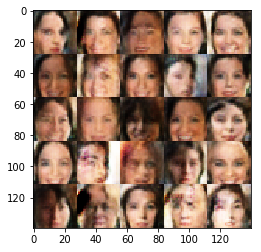

Epoch 1/1... Step 3410/6331... Discriminator Loss 1.3690 Generator Loss 0.8210
Epoch 1/1... Step 3420/6331... Discriminator Loss 1.3800 Generator Loss 0.7422
Epoch 1/1... Step 3430/6331... Discriminator Loss 1.3723 Generator Loss 0.8035
Epoch 1/1... Step 3440/6331... Discriminator Loss 1.3885 Generator Loss 0.7737
Epoch 1/1... Step 3450/6331... Discriminator Loss 1.3542 Generator Loss 0.7767
Epoch 1/1... Step 3460/6331... Discriminator Loss 1.4133 Generator Loss 0.7502
Epoch 1/1... Step 3470/6331... Discriminator Loss 1.3784 Generator Loss 0.8042
Epoch 1/1... Step 3480/6331... Discriminator Loss 1.3878 Generator Loss 0.7692
Epoch 1/1... Step 3490/6331... Discriminator Loss 1.3641 Generator Loss 0.7808
Epoch 1/1... Step 3500/6331... Discriminator Loss 1.3967 Generator Loss 0.7747


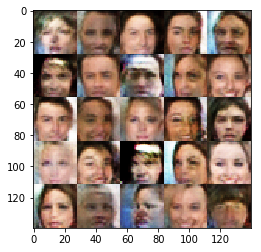

Epoch 1/1... Step 3510/6331... Discriminator Loss 1.3811 Generator Loss 0.7881
Epoch 1/1... Step 3520/6331... Discriminator Loss 1.3569 Generator Loss 0.7798
Epoch 1/1... Step 3530/6331... Discriminator Loss 1.3818 Generator Loss 0.7993
Epoch 1/1... Step 3540/6331... Discriminator Loss 1.3557 Generator Loss 0.8121
Epoch 1/1... Step 3550/6331... Discriminator Loss 1.3934 Generator Loss 0.7822
Epoch 1/1... Step 3560/6331... Discriminator Loss 1.3923 Generator Loss 0.7938
Epoch 1/1... Step 3570/6331... Discriminator Loss 1.3868 Generator Loss 0.8118
Epoch 1/1... Step 3580/6331... Discriminator Loss 1.3920 Generator Loss 0.7780
Epoch 1/1... Step 3590/6331... Discriminator Loss 1.3675 Generator Loss 0.8006
Epoch 1/1... Step 3600/6331... Discriminator Loss 1.3780 Generator Loss 0.7771


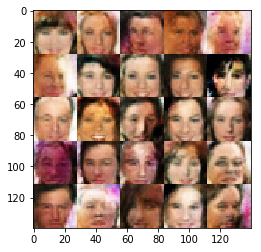

Epoch 1/1... Step 3610/6331... Discriminator Loss 1.3643 Generator Loss 0.7778
Epoch 1/1... Step 3620/6331... Discriminator Loss 1.3808 Generator Loss 0.8042
Epoch 1/1... Step 3630/6331... Discriminator Loss 1.3757 Generator Loss 0.7821
Epoch 1/1... Step 3640/6331... Discriminator Loss 1.3734 Generator Loss 0.7623
Epoch 1/1... Step 3650/6331... Discriminator Loss 1.3658 Generator Loss 0.7917
Epoch 1/1... Step 3660/6331... Discriminator Loss 1.4127 Generator Loss 0.7081
Epoch 1/1... Step 3670/6331... Discriminator Loss 1.3483 Generator Loss 0.7341
Epoch 1/1... Step 3680/6331... Discriminator Loss 1.3802 Generator Loss 0.7547
Epoch 1/1... Step 3690/6331... Discriminator Loss 1.3718 Generator Loss 0.7975
Epoch 1/1... Step 3700/6331... Discriminator Loss 1.3604 Generator Loss 0.7993


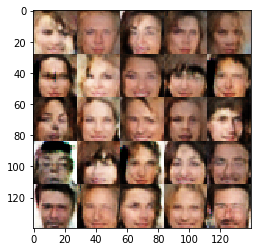

Epoch 1/1... Step 3710/6331... Discriminator Loss 1.4271 Generator Loss 0.7379
Epoch 1/1... Step 3720/6331... Discriminator Loss 1.3929 Generator Loss 0.7513
Epoch 1/1... Step 3730/6331... Discriminator Loss 1.3834 Generator Loss 0.7570
Epoch 1/1... Step 3740/6331... Discriminator Loss 1.3837 Generator Loss 0.7948
Epoch 1/1... Step 3750/6331... Discriminator Loss 1.3731 Generator Loss 0.7695
Epoch 1/1... Step 3760/6331... Discriminator Loss 1.3859 Generator Loss 0.7867
Epoch 1/1... Step 3770/6331... Discriminator Loss 1.3675 Generator Loss 0.7813
Epoch 1/1... Step 3780/6331... Discriminator Loss 1.3572 Generator Loss 0.7843
Epoch 1/1... Step 3790/6331... Discriminator Loss 1.3906 Generator Loss 0.7912
Epoch 1/1... Step 3800/6331... Discriminator Loss 1.3571 Generator Loss 0.8698


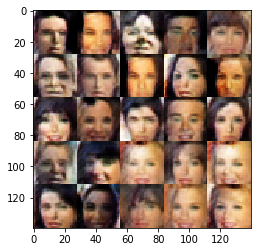

Epoch 1/1... Step 3810/6331... Discriminator Loss 1.3643 Generator Loss 0.7751
Epoch 1/1... Step 3820/6331... Discriminator Loss 1.3560 Generator Loss 0.7742
Epoch 1/1... Step 3830/6331... Discriminator Loss 1.3793 Generator Loss 0.7595
Epoch 1/1... Step 3840/6331... Discriminator Loss 1.3761 Generator Loss 0.7881
Epoch 1/1... Step 3850/6331... Discriminator Loss 1.3816 Generator Loss 0.7759
Epoch 1/1... Step 3860/6331... Discriminator Loss 1.3757 Generator Loss 0.7997
Epoch 1/1... Step 3870/6331... Discriminator Loss 1.3866 Generator Loss 0.7695
Epoch 1/1... Step 3880/6331... Discriminator Loss 1.3689 Generator Loss 0.7581
Epoch 1/1... Step 3890/6331... Discriminator Loss 1.3855 Generator Loss 0.7965
Epoch 1/1... Step 3900/6331... Discriminator Loss 1.3710 Generator Loss 0.7918


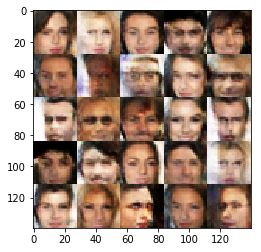

Epoch 1/1... Step 3910/6331... Discriminator Loss 1.4127 Generator Loss 0.7385
Epoch 1/1... Step 3920/6331... Discriminator Loss 1.3640 Generator Loss 0.7985
Epoch 1/1... Step 3930/6331... Discriminator Loss 1.3788 Generator Loss 0.7927
Epoch 1/1... Step 3940/6331... Discriminator Loss 1.3623 Generator Loss 0.8045
Epoch 1/1... Step 3950/6331... Discriminator Loss 1.3814 Generator Loss 0.7669
Epoch 1/1... Step 3960/6331... Discriminator Loss 1.3718 Generator Loss 0.8054
Epoch 1/1... Step 3970/6331... Discriminator Loss 1.3752 Generator Loss 0.7905
Epoch 1/1... Step 3980/6331... Discriminator Loss 1.3738 Generator Loss 0.7813
Epoch 1/1... Step 3990/6331... Discriminator Loss 1.4072 Generator Loss 0.7442
Epoch 1/1... Step 4000/6331... Discriminator Loss 1.3981 Generator Loss 0.7990


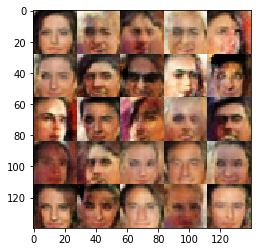

Epoch 1/1... Step 4010/6331... Discriminator Loss 1.3720 Generator Loss 0.8044
Epoch 1/1... Step 4020/6331... Discriminator Loss 1.3797 Generator Loss 0.7919
Epoch 1/1... Step 4030/6331... Discriminator Loss 1.3625 Generator Loss 0.8318
Epoch 1/1... Step 4040/6331... Discriminator Loss 1.3735 Generator Loss 0.7878
Epoch 1/1... Step 4050/6331... Discriminator Loss 1.4005 Generator Loss 0.7754
Epoch 1/1... Step 4060/6331... Discriminator Loss 1.3876 Generator Loss 0.8052
Epoch 1/1... Step 4070/6331... Discriminator Loss 1.3954 Generator Loss 0.8153
Epoch 1/1... Step 4080/6331... Discriminator Loss 1.3860 Generator Loss 0.7791
Epoch 1/1... Step 4090/6331... Discriminator Loss 1.3944 Generator Loss 0.7482
Epoch 1/1... Step 4100/6331... Discriminator Loss 1.3776 Generator Loss 0.7703


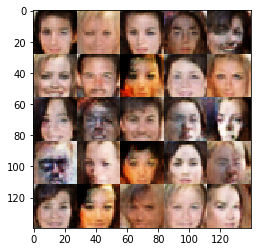

Epoch 1/1... Step 4110/6331... Discriminator Loss 1.3719 Generator Loss 0.8005
Epoch 1/1... Step 4120/6331... Discriminator Loss 1.3716 Generator Loss 0.7844
Epoch 1/1... Step 4130/6331... Discriminator Loss 1.3557 Generator Loss 0.8217
Epoch 1/1... Step 4140/6331... Discriminator Loss 1.3720 Generator Loss 0.8061
Epoch 1/1... Step 4150/6331... Discriminator Loss 1.4019 Generator Loss 0.8006
Epoch 1/1... Step 4160/6331... Discriminator Loss 1.3777 Generator Loss 0.7905
Epoch 1/1... Step 4170/6331... Discriminator Loss 1.3818 Generator Loss 0.7821
Epoch 1/1... Step 4180/6331... Discriminator Loss 1.3742 Generator Loss 0.8027
Epoch 1/1... Step 4190/6331... Discriminator Loss 1.3612 Generator Loss 0.7822
Epoch 1/1... Step 4200/6331... Discriminator Loss 1.3626 Generator Loss 0.7709


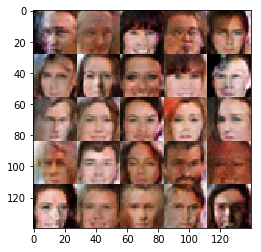

Epoch 1/1... Step 4210/6331... Discriminator Loss 1.3742 Generator Loss 0.8211
Epoch 1/1... Step 4220/6331... Discriminator Loss 1.4095 Generator Loss 0.7592
Epoch 1/1... Step 4230/6331... Discriminator Loss 1.3896 Generator Loss 0.7854
Epoch 1/1... Step 4240/6331... Discriminator Loss 1.4004 Generator Loss 0.7940
Epoch 1/1... Step 4250/6331... Discriminator Loss 1.3858 Generator Loss 0.7329
Epoch 1/1... Step 4260/6331... Discriminator Loss 1.3873 Generator Loss 0.7766
Epoch 1/1... Step 4270/6331... Discriminator Loss 1.3646 Generator Loss 0.7782
Epoch 1/1... Step 4280/6331... Discriminator Loss 1.3753 Generator Loss 0.7875
Epoch 1/1... Step 4290/6331... Discriminator Loss 1.3771 Generator Loss 0.7749
Epoch 1/1... Step 4300/6331... Discriminator Loss 1.3786 Generator Loss 0.8165


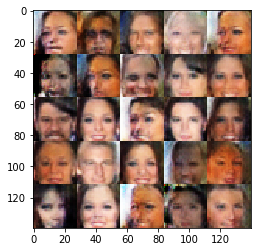

Epoch 1/1... Step 4310/6331... Discriminator Loss 1.3903 Generator Loss 0.7720
Epoch 1/1... Step 4320/6331... Discriminator Loss 1.3714 Generator Loss 0.7934
Epoch 1/1... Step 4330/6331... Discriminator Loss 1.3994 Generator Loss 0.7565
Epoch 1/1... Step 4340/6331... Discriminator Loss 1.3699 Generator Loss 0.7920
Epoch 1/1... Step 4350/6331... Discriminator Loss 1.3675 Generator Loss 0.7915
Epoch 1/1... Step 4360/6331... Discriminator Loss 1.3881 Generator Loss 0.7826
Epoch 1/1... Step 4370/6331... Discriminator Loss 1.3635 Generator Loss 0.7601
Epoch 1/1... Step 4380/6331... Discriminator Loss 1.3932 Generator Loss 0.7533
Epoch 1/1... Step 4390/6331... Discriminator Loss 1.3757 Generator Loss 0.7689
Epoch 1/1... Step 4400/6331... Discriminator Loss 1.3700 Generator Loss 0.7451


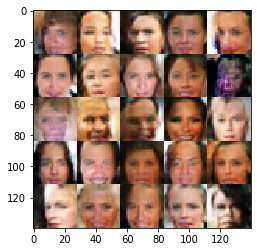

Epoch 1/1... Step 4410/6331... Discriminator Loss 1.3790 Generator Loss 0.7753
Epoch 1/1... Step 4420/6331... Discriminator Loss 1.3655 Generator Loss 0.7760
Epoch 1/1... Step 4430/6331... Discriminator Loss 1.3926 Generator Loss 0.7714
Epoch 1/1... Step 4440/6331... Discriminator Loss 1.3577 Generator Loss 0.7996
Epoch 1/1... Step 4450/6331... Discriminator Loss 1.3840 Generator Loss 0.7752
Epoch 1/1... Step 4460/6331... Discriminator Loss 1.3827 Generator Loss 0.7621
Epoch 1/1... Step 4470/6331... Discriminator Loss 1.3739 Generator Loss 0.7900
Epoch 1/1... Step 4480/6331... Discriminator Loss 1.3741 Generator Loss 0.8042
Epoch 1/1... Step 4490/6331... Discriminator Loss 1.3744 Generator Loss 0.7988
Epoch 1/1... Step 4500/6331... Discriminator Loss 1.3911 Generator Loss 0.7686


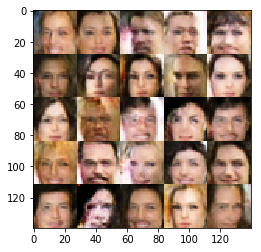

Epoch 1/1... Step 4510/6331... Discriminator Loss 1.3546 Generator Loss 0.8220
Epoch 1/1... Step 4520/6331... Discriminator Loss 1.3870 Generator Loss 0.7640
Epoch 1/1... Step 4530/6331... Discriminator Loss 1.3828 Generator Loss 0.7790
Epoch 1/1... Step 4540/6331... Discriminator Loss 1.3811 Generator Loss 0.7787
Epoch 1/1... Step 4550/6331... Discriminator Loss 1.3688 Generator Loss 0.7829
Epoch 1/1... Step 4560/6331... Discriminator Loss 1.3617 Generator Loss 0.7655
Epoch 1/1... Step 4570/6331... Discriminator Loss 1.3727 Generator Loss 0.7935
Epoch 1/1... Step 4580/6331... Discriminator Loss 1.3619 Generator Loss 0.7874
Epoch 1/1... Step 4590/6331... Discriminator Loss 1.3605 Generator Loss 0.7942
Epoch 1/1... Step 4600/6331... Discriminator Loss 1.3899 Generator Loss 0.7937


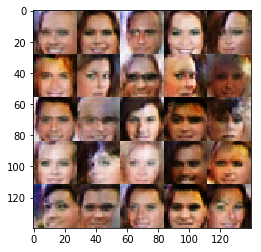

Epoch 1/1... Step 4610/6331... Discriminator Loss 1.3660 Generator Loss 0.7499
Epoch 1/1... Step 4620/6331... Discriminator Loss 1.3856 Generator Loss 0.7614
Epoch 1/1... Step 4630/6331... Discriminator Loss 1.3804 Generator Loss 0.7860
Epoch 1/1... Step 4640/6331... Discriminator Loss 1.3651 Generator Loss 0.8134
Epoch 1/1... Step 4650/6331... Discriminator Loss 1.3903 Generator Loss 0.7493
Epoch 1/1... Step 4660/6331... Discriminator Loss 1.3750 Generator Loss 0.7662
Epoch 1/1... Step 4670/6331... Discriminator Loss 1.3731 Generator Loss 0.7881
Epoch 1/1... Step 4680/6331... Discriminator Loss 1.3700 Generator Loss 0.7774
Epoch 1/1... Step 4690/6331... Discriminator Loss 1.3659 Generator Loss 0.7140
Epoch 1/1... Step 4700/6331... Discriminator Loss 1.3702 Generator Loss 0.7862


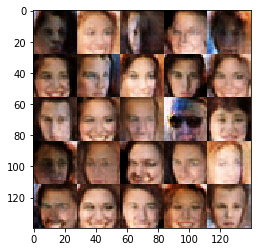

Epoch 1/1... Step 4710/6331... Discriminator Loss 1.3965 Generator Loss 0.7497
Epoch 1/1... Step 4720/6331... Discriminator Loss 1.3779 Generator Loss 0.8092
Epoch 1/1... Step 4730/6331... Discriminator Loss 1.3659 Generator Loss 0.7817
Epoch 1/1... Step 4740/6331... Discriminator Loss 1.3684 Generator Loss 0.7935
Epoch 1/1... Step 4750/6331... Discriminator Loss 1.3916 Generator Loss 0.7752
Epoch 1/1... Step 4760/6331... Discriminator Loss 1.3991 Generator Loss 0.7924
Epoch 1/1... Step 4770/6331... Discriminator Loss 1.3629 Generator Loss 0.8106
Epoch 1/1... Step 4780/6331... Discriminator Loss 1.3780 Generator Loss 0.7809
Epoch 1/1... Step 4790/6331... Discriminator Loss 1.3792 Generator Loss 0.8001
Epoch 1/1... Step 4800/6331... Discriminator Loss 1.3873 Generator Loss 0.7834


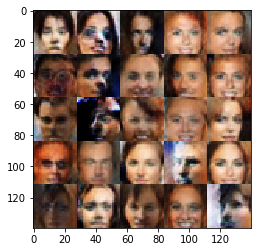

Epoch 1/1... Step 4810/6331... Discriminator Loss 1.3863 Generator Loss 0.7467
Epoch 1/1... Step 4820/6331... Discriminator Loss 1.3687 Generator Loss 0.7607
Epoch 1/1... Step 4830/6331... Discriminator Loss 1.3789 Generator Loss 0.7634
Epoch 1/1... Step 4840/6331... Discriminator Loss 1.3817 Generator Loss 0.7906
Epoch 1/1... Step 4850/6331... Discriminator Loss 1.3736 Generator Loss 0.7760
Epoch 1/1... Step 4860/6331... Discriminator Loss 1.3858 Generator Loss 0.7675
Epoch 1/1... Step 4870/6331... Discriminator Loss 1.3775 Generator Loss 0.7676
Epoch 1/1... Step 4880/6331... Discriminator Loss 1.3822 Generator Loss 0.7806
Epoch 1/1... Step 4890/6331... Discriminator Loss 1.3725 Generator Loss 0.7673
Epoch 1/1... Step 4900/6331... Discriminator Loss 1.3966 Generator Loss 0.7655


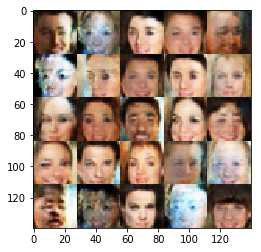

Epoch 1/1... Step 4910/6331... Discriminator Loss 1.3880 Generator Loss 0.7789
Epoch 1/1... Step 4920/6331... Discriminator Loss 1.3786 Generator Loss 0.7883
Epoch 1/1... Step 4930/6331... Discriminator Loss 1.3700 Generator Loss 0.8127
Epoch 1/1... Step 4940/6331... Discriminator Loss 1.3626 Generator Loss 0.7944
Epoch 1/1... Step 4950/6331... Discriminator Loss 1.3778 Generator Loss 0.7829
Epoch 1/1... Step 4960/6331... Discriminator Loss 1.3866 Generator Loss 0.7612
Epoch 1/1... Step 4970/6331... Discriminator Loss 1.3799 Generator Loss 0.8006
Epoch 1/1... Step 4980/6331... Discriminator Loss 1.3765 Generator Loss 0.7969
Epoch 1/1... Step 4990/6331... Discriminator Loss 1.3841 Generator Loss 0.7743
Epoch 1/1... Step 5000/6331... Discriminator Loss 1.3748 Generator Loss 0.7770


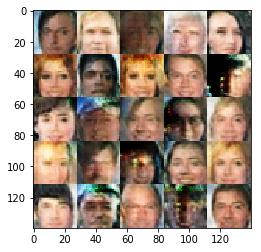

Epoch 1/1... Step 5010/6331... Discriminator Loss 1.3632 Generator Loss 0.7984
Epoch 1/1... Step 5020/6331... Discriminator Loss 1.3872 Generator Loss 0.7733
Epoch 1/1... Step 5030/6331... Discriminator Loss 1.3915 Generator Loss 0.7937
Epoch 1/1... Step 5040/6331... Discriminator Loss 1.3757 Generator Loss 0.7812
Epoch 1/1... Step 5050/6331... Discriminator Loss 1.3725 Generator Loss 0.7717
Epoch 1/1... Step 5060/6331... Discriminator Loss 1.3605 Generator Loss 0.8039
Epoch 1/1... Step 5070/6331... Discriminator Loss 1.3681 Generator Loss 0.7927
Epoch 1/1... Step 5080/6331... Discriminator Loss 1.3736 Generator Loss 0.7654
Epoch 1/1... Step 5090/6331... Discriminator Loss 1.3727 Generator Loss 0.7980
Epoch 1/1... Step 5100/6331... Discriminator Loss 1.3908 Generator Loss 0.7844


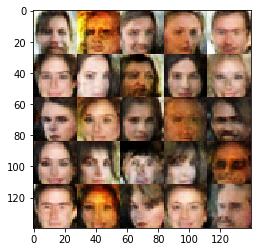

Epoch 1/1... Step 5110/6331... Discriminator Loss 1.3741 Generator Loss 0.8141
Epoch 1/1... Step 5120/6331... Discriminator Loss 1.3659 Generator Loss 0.7775
Epoch 1/1... Step 5130/6331... Discriminator Loss 1.3929 Generator Loss 0.7701
Epoch 1/1... Step 5140/6331... Discriminator Loss 1.3771 Generator Loss 0.7877
Epoch 1/1... Step 5150/6331... Discriminator Loss 1.3785 Generator Loss 0.8059
Epoch 1/1... Step 5160/6331... Discriminator Loss 1.3849 Generator Loss 0.7735
Epoch 1/1... Step 5170/6331... Discriminator Loss 1.3728 Generator Loss 0.7918
Epoch 1/1... Step 5180/6331... Discriminator Loss 1.3953 Generator Loss 0.7845
Epoch 1/1... Step 5190/6331... Discriminator Loss 1.3826 Generator Loss 0.7548
Epoch 1/1... Step 5200/6331... Discriminator Loss 1.3687 Generator Loss 0.7960


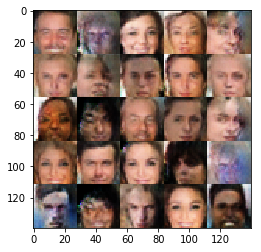

Epoch 1/1... Step 5210/6331... Discriminator Loss 1.3709 Generator Loss 0.7892
Epoch 1/1... Step 5220/6331... Discriminator Loss 1.3887 Generator Loss 0.7624
Epoch 1/1... Step 5230/6331... Discriminator Loss 1.3784 Generator Loss 0.7995
Epoch 1/1... Step 5240/6331... Discriminator Loss 1.3825 Generator Loss 0.7719
Epoch 1/1... Step 5250/6331... Discriminator Loss 1.3567 Generator Loss 0.7813
Epoch 1/1... Step 5260/6331... Discriminator Loss 1.3726 Generator Loss 0.7758
Epoch 1/1... Step 5270/6331... Discriminator Loss 1.3718 Generator Loss 0.7774
Epoch 1/1... Step 5280/6331... Discriminator Loss 1.3558 Generator Loss 0.7855
Epoch 1/1... Step 5290/6331... Discriminator Loss 1.3764 Generator Loss 0.8088
Epoch 1/1... Step 5300/6331... Discriminator Loss 1.3602 Generator Loss 0.8045


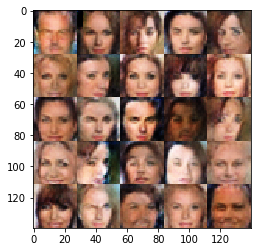

Epoch 1/1... Step 5310/6331... Discriminator Loss 1.3857 Generator Loss 0.7660
Epoch 1/1... Step 5320/6331... Discriminator Loss 1.3781 Generator Loss 0.7661
Epoch 1/1... Step 5330/6331... Discriminator Loss 1.3808 Generator Loss 0.7754
Epoch 1/1... Step 5340/6331... Discriminator Loss 1.3774 Generator Loss 0.7732
Epoch 1/1... Step 5350/6331... Discriminator Loss 1.3635 Generator Loss 0.7831
Epoch 1/1... Step 5360/6331... Discriminator Loss 1.3861 Generator Loss 0.7862
Epoch 1/1... Step 5370/6331... Discriminator Loss 1.4007 Generator Loss 0.7596
Epoch 1/1... Step 5380/6331... Discriminator Loss 1.3696 Generator Loss 0.7802
Epoch 1/1... Step 5390/6331... Discriminator Loss 1.3739 Generator Loss 0.7985
Epoch 1/1... Step 5400/6331... Discriminator Loss 1.3867 Generator Loss 0.7776


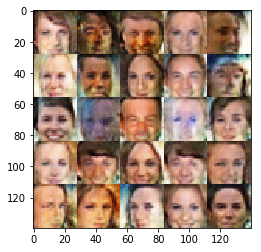

Epoch 1/1... Step 5410/6331... Discriminator Loss 1.3748 Generator Loss 0.7759
Epoch 1/1... Step 5420/6331... Discriminator Loss 1.3848 Generator Loss 0.7551
Epoch 1/1... Step 5430/6331... Discriminator Loss 1.3886 Generator Loss 0.7732
Epoch 1/1... Step 5440/6331... Discriminator Loss 1.3763 Generator Loss 0.7914
Epoch 1/1... Step 5450/6331... Discriminator Loss 1.3936 Generator Loss 0.8119
Epoch 1/1... Step 5460/6331... Discriminator Loss 1.3736 Generator Loss 0.8077
Epoch 1/1... Step 5470/6331... Discriminator Loss 1.3600 Generator Loss 0.8037
Epoch 1/1... Step 5480/6331... Discriminator Loss 1.3751 Generator Loss 0.8159
Epoch 1/1... Step 5490/6331... Discriminator Loss 1.3756 Generator Loss 0.7860
Epoch 1/1... Step 5500/6331... Discriminator Loss 1.3704 Generator Loss 0.7801


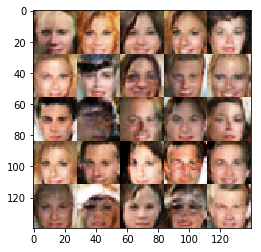

Epoch 1/1... Step 5510/6331... Discriminator Loss 1.3912 Generator Loss 0.7593
Epoch 1/1... Step 5520/6331... Discriminator Loss 1.3834 Generator Loss 0.7624
Epoch 1/1... Step 5530/6331... Discriminator Loss 1.3930 Generator Loss 0.7781
Epoch 1/1... Step 5540/6331... Discriminator Loss 1.3929 Generator Loss 0.7579
Epoch 1/1... Step 5550/6331... Discriminator Loss 1.3588 Generator Loss 0.7732
Epoch 1/1... Step 5560/6331... Discriminator Loss 1.3744 Generator Loss 0.7909
Epoch 1/1... Step 5570/6331... Discriminator Loss 1.3855 Generator Loss 0.7889
Epoch 1/1... Step 5580/6331... Discriminator Loss 1.3818 Generator Loss 0.7659
Epoch 1/1... Step 5590/6331... Discriminator Loss 1.3688 Generator Loss 0.7880
Epoch 1/1... Step 5600/6331... Discriminator Loss 1.3645 Generator Loss 0.8029


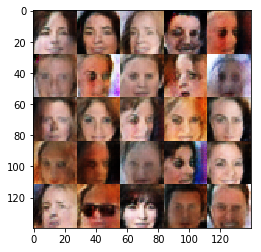

Epoch 1/1... Step 5610/6331... Discriminator Loss 1.3900 Generator Loss 0.7784
Epoch 1/1... Step 5620/6331... Discriminator Loss 1.3666 Generator Loss 0.7917
Epoch 1/1... Step 5630/6331... Discriminator Loss 1.3740 Generator Loss 0.7831
Epoch 1/1... Step 5640/6331... Discriminator Loss 1.3679 Generator Loss 0.7899
Epoch 1/1... Step 5650/6331... Discriminator Loss 1.3922 Generator Loss 0.7910
Epoch 1/1... Step 5660/6331... Discriminator Loss 1.3772 Generator Loss 0.8151
Epoch 1/1... Step 5670/6331... Discriminator Loss 1.3892 Generator Loss 0.8015
Epoch 1/1... Step 5680/6331... Discriminator Loss 1.3816 Generator Loss 0.7751
Epoch 1/1... Step 5690/6331... Discriminator Loss 1.3856 Generator Loss 0.7686
Epoch 1/1... Step 5700/6331... Discriminator Loss 1.3793 Generator Loss 0.7988


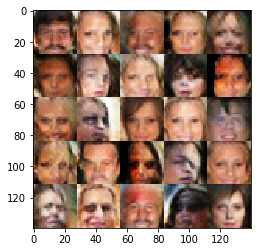

Epoch 1/1... Step 5710/6331... Discriminator Loss 1.3713 Generator Loss 0.8145
Epoch 1/1... Step 5720/6331... Discriminator Loss 1.3852 Generator Loss 0.7944
Epoch 1/1... Step 5730/6331... Discriminator Loss 1.3827 Generator Loss 0.7700
Epoch 1/1... Step 5740/6331... Discriminator Loss 1.3612 Generator Loss 0.8019
Epoch 1/1... Step 5750/6331... Discriminator Loss 1.3934 Generator Loss 0.7705
Epoch 1/1... Step 5760/6331... Discriminator Loss 1.3571 Generator Loss 0.8036
Epoch 1/1... Step 5770/6331... Discriminator Loss 1.3838 Generator Loss 0.8080
Epoch 1/1... Step 5780/6331... Discriminator Loss 1.3807 Generator Loss 0.8210
Epoch 1/1... Step 5790/6331... Discriminator Loss 1.3783 Generator Loss 0.7973
Epoch 1/1... Step 5800/6331... Discriminator Loss 1.3788 Generator Loss 0.7724


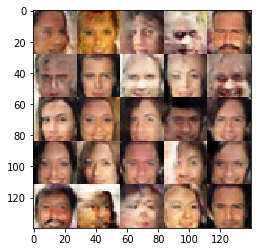

Epoch 1/1... Step 5810/6331... Discriminator Loss 1.3693 Generator Loss 0.7782
Epoch 1/1... Step 5820/6331... Discriminator Loss 1.3699 Generator Loss 0.7850
Epoch 1/1... Step 5830/6331... Discriminator Loss 1.3721 Generator Loss 0.7588
Epoch 1/1... Step 5840/6331... Discriminator Loss 1.3763 Generator Loss 0.7834
Epoch 1/1... Step 5850/6331... Discriminator Loss 1.3762 Generator Loss 0.7831
Epoch 1/1... Step 5860/6331... Discriminator Loss 1.3925 Generator Loss 0.7768
Epoch 1/1... Step 5870/6331... Discriminator Loss 1.3835 Generator Loss 0.8246
Epoch 1/1... Step 5880/6331... Discriminator Loss 1.3655 Generator Loss 0.7793
Epoch 1/1... Step 5890/6331... Discriminator Loss 1.3765 Generator Loss 0.7586
Epoch 1/1... Step 5900/6331... Discriminator Loss 1.3828 Generator Loss 0.7863


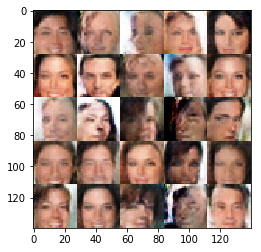

Epoch 1/1... Step 5910/6331... Discriminator Loss 1.3728 Generator Loss 0.7993
Epoch 1/1... Step 5920/6331... Discriminator Loss 1.3886 Generator Loss 0.7608
Epoch 1/1... Step 5930/6331... Discriminator Loss 1.3721 Generator Loss 0.7935
Epoch 1/1... Step 5940/6331... Discriminator Loss 1.3799 Generator Loss 0.7713
Epoch 1/1... Step 5950/6331... Discriminator Loss 1.3768 Generator Loss 0.7989
Epoch 1/1... Step 5960/6331... Discriminator Loss 1.3872 Generator Loss 0.7920
Epoch 1/1... Step 5970/6331... Discriminator Loss 1.3764 Generator Loss 0.7965
Epoch 1/1... Step 5980/6331... Discriminator Loss 1.3985 Generator Loss 0.7796
Epoch 1/1... Step 5990/6331... Discriminator Loss 1.3624 Generator Loss 0.7805
Epoch 1/1... Step 6000/6331... Discriminator Loss 1.3759 Generator Loss 0.7805


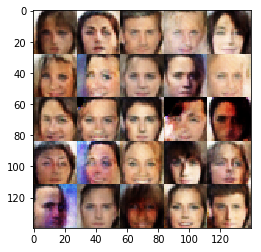

Epoch 1/1... Step 6010/6331... Discriminator Loss 1.3771 Generator Loss 0.7821
Epoch 1/1... Step 6020/6331... Discriminator Loss 1.3740 Generator Loss 0.7764
Epoch 1/1... Step 6030/6331... Discriminator Loss 1.3626 Generator Loss 0.7931
Epoch 1/1... Step 6040/6331... Discriminator Loss 1.3708 Generator Loss 0.7733
Epoch 1/1... Step 6050/6331... Discriminator Loss 1.3761 Generator Loss 0.7640
Epoch 1/1... Step 6060/6331... Discriminator Loss 1.3822 Generator Loss 0.7683
Epoch 1/1... Step 6070/6331... Discriminator Loss 1.3880 Generator Loss 0.7774
Epoch 1/1... Step 6080/6331... Discriminator Loss 1.3764 Generator Loss 0.7665
Epoch 1/1... Step 6090/6331... Discriminator Loss 1.3833 Generator Loss 0.7971
Epoch 1/1... Step 6100/6331... Discriminator Loss 1.3738 Generator Loss 0.7733


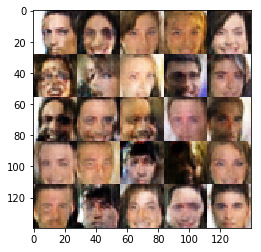

Epoch 1/1... Step 6110/6331... Discriminator Loss 1.3712 Generator Loss 0.7969
Epoch 1/1... Step 6120/6331... Discriminator Loss 1.3777 Generator Loss 0.7950
Epoch 1/1... Step 6130/6331... Discriminator Loss 1.4062 Generator Loss 0.7792
Epoch 1/1... Step 6140/6331... Discriminator Loss 1.3670 Generator Loss 0.7889
Epoch 1/1... Step 6150/6331... Discriminator Loss 1.3862 Generator Loss 0.7862
Epoch 1/1... Step 6160/6331... Discriminator Loss 1.3739 Generator Loss 0.7915
Epoch 1/1... Step 6170/6331... Discriminator Loss 1.3812 Generator Loss 0.7884
Epoch 1/1... Step 6180/6331... Discriminator Loss 1.3815 Generator Loss 0.7738
Epoch 1/1... Step 6190/6331... Discriminator Loss 1.3686 Generator Loss 0.7869
Epoch 1/1... Step 6200/6331... Discriminator Loss 1.3839 Generator Loss 0.7746


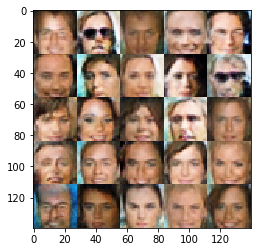

Epoch 1/1... Step 6210/6331... Discriminator Loss 1.3710 Generator Loss 0.7903
Epoch 1/1... Step 6220/6331... Discriminator Loss 1.3716 Generator Loss 0.8012
Epoch 1/1... Step 6230/6331... Discriminator Loss 1.3786 Generator Loss 0.7761
Epoch 1/1... Step 6240/6331... Discriminator Loss 1.3688 Generator Loss 0.7845
Epoch 1/1... Step 6250/6331... Discriminator Loss 1.3844 Generator Loss 0.8165
Epoch 1/1... Step 6260/6331... Discriminator Loss 1.3803 Generator Loss 0.8042
Epoch 1/1... Step 6270/6331... Discriminator Loss 1.3835 Generator Loss 0.7824
Epoch 1/1... Step 6280/6331... Discriminator Loss 1.3824 Generator Loss 0.7819
Epoch 1/1... Step 6290/6331... Discriminator Loss 1.3728 Generator Loss 0.7897
Epoch 1/1... Step 6300/6331... Discriminator Loss 1.3724 Generator Loss 0.7912


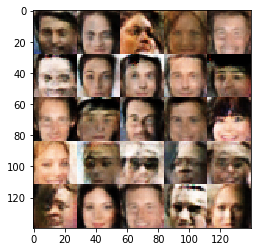

Epoch 1/1... Step 6310/6331... Discriminator Loss 1.3799 Generator Loss 0.8073
Epoch 1/1... Step 6320/6331... Discriminator Loss 1.3821 Generator Loss 0.7766
Epoch 1/1... Step 6330/6331... Discriminator Loss 1.3631 Generator Loss 0.8025


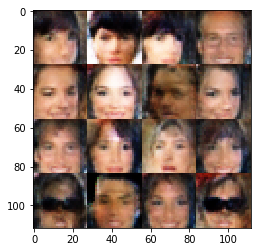

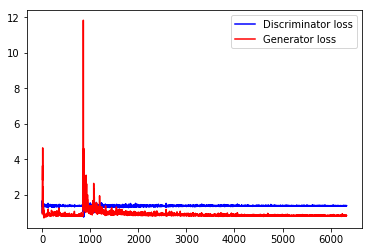

In [14]:
batch_size = 32
z_dim = 200
learning_rate = 0.0004
beta1 = 0.2
alpha = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.